# Monte Carlo Integration and MCI via Importance Function

#### Author: Bruno Cavani

---

We intend to calculate $\mathbb{E}(\theta)$, where $\theta \sim$ Beta(8,4). To do this, we first use the Monte Carlo integration approach, in which we leverage the result of the Law of Large Numbers to calculate the sample mean rather than solving the potentially unpleasant algebra that can arise from the integral operator after evaluating the mean of a variable Beta distributed random. After that, we took an alternative approach where we dispensed with using the Beta distribution to take the open-and-shut Uniform distribution to extract a sample of $\theta$-values, functioning as an importance function.

Recall that the exact computation yields $\mathbb{E}(\theta) = 8/12 = 2/3$.

In [1]:
using Distributions
using SpecialFunctions
using Plots

## Monte Carlo Integration

First, as anticipated, the Monte Carlo integration basic lies on the following steps:

1. Collect $M$ values of $\theta \sim \text{Beta}(\theta)$, i.e. from its original probability density function, and save the sample $\{\theta_i\}_{i=1}^M$;

2. Compute the sequence of sample average values,
\begin{align*}
    \bar{X}_n = \frac{\sum_{i=1}^n \theta_i}{n}, \quad \forall \,n \in \{1,\ldots,M\};
\end{align*}

3. Take the mean of sample average values $\mathbb{E}[\{X_n\}]$.

In [2]:
# Monte Carlo Integration

M = 10000
n = 20
sim = zeros(n,M)

for i in 1:n
    theta = rand(Beta(8,4),M)
    gtheta = theta
    sim[i,:] = cumsum(gtheta)./collect(1:M)
end

In [3]:
mean(sim)

0.6669933598828461

## Monte Carlo Integration via Importance Function

Alternatively, we could also take the Monte Carlo integration using importance function. Assume that one faces the same problem of computing $\mathbb{E}(\theta)$, where $\theta \sim$ Beta(8,4). In this case, instead of computing the sample average of such Beta-distributed random variable, suppose that we choose a auxiliar density function $q(\theta) \sim \text{Uniform}(0.3,1)$, from which we might collect a sample $\{\theta_i\}$ of values of $\theta$. After that, $g(\theta)$ computes the so-called weights (i.e. the ratio of original/real probability density function by the auxiliary one, both evaluated in the sample $\{\theta_i\}$ previously extracted).

In [4]:
# Monte Carlo Integration via Importance Function

# Let Uniform(a,b) be the Importance Function

a = 0.3
b = 1.0
sim1 = zeros(20,M)

for i in 1:n
    theta = rand(Uniform(a,b),M)
    gtheta = theta.*pdf.(Beta(8,4),theta)./(1/(b-a))
    sim1[i,:] = cumsum(gtheta)./collect(1:M)
end

In [5]:
mean(sim1)

0.6643038390508667

From both the above techniques, we have that the Monte Carlo integration and its version using importance functions are quite useful for computing some integrals. The following graph wraps it up, where we plot both the convergences against the exact value of Beta mean.

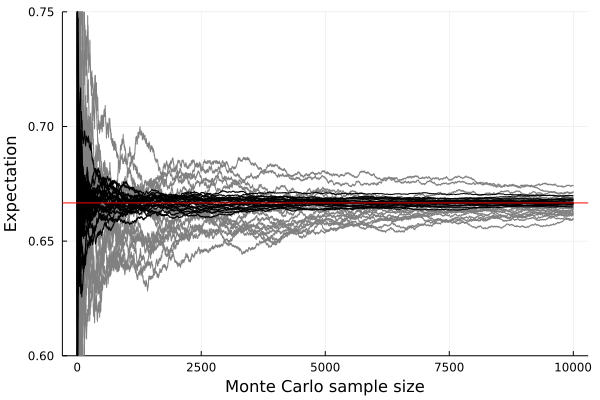

In [7]:
plot(transpose(sim1),c=:grey,ylim=(0.6,0.75),xlabel="Monte Carlo sample size",ylabel="Expectation",legend=false,
     fmt = png)
for i in 1:n
    plot!(sim[i,:],c=:black)
end
hline!([2/3],c=:red)
current()